In [1]:
import subprocess
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from random import randint
from sklearn.model_selection import train_test_split
from IPython.display import clear_output
from tensorflow.keras import layers

In [3]:
# Load downloaded data into numpy.ndarray
X = np.load("../image_data.npy")
Y = np.load("../label_data.npy")

# Declare label names and declaring functions for later use
label_names = [
    'Bicycle', 'Bridge', 'Bus', 'Car', 'Chimney',
    'Crosswalk', 'Hydrant', 'Motorcycle', 'Other', 'Palm', 'Stair',
    'Traffic Light'
]


def decodeDataset(coded):
    return label_names[np.argmax(coded, axis=1)]


def decode(label):
    return label_names[np.argmax(label)]


def plotImage(img, label):
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(label)
    plt.imshow(img)
    plt.show()

In [4]:
# Split the training and testing data
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=69)

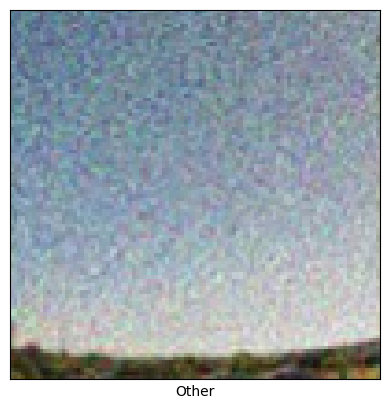

In [5]:
# Displaying one example from the dataset after splitting
plotImage(xtrain[0], decode(ytrain[0]))

In [6]:
# Defining compilation and training functions
def compile(model, epoch):
  # Compilation using adam optimization algorithm
  model.compile(
    optimizer="adam",
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
  ) 
  history = model.fit(
    xtrain,
    ytrain,
    epochs=epoch,
    validation_data=(xtest, ytest)
  )
  return model, history

def setfigure():
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.ylim([0, 1])
  plt.legend(loc='lower right')
  plt.show()

def evaluate(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  setfigure()

def checkmodel(model, epoch):
  result, hist = compile(model, epoch)
  evaluate(hist)
  test_loss, test_acc = result.evaluate(xtest, ytest, verbose=2)
  return result, hist

def comparegraph(hist1, hist2):
  hist = [hist1, hist2]
  for i in hist:
    plt.plot(i.history['accuracy'], label='accuracy')
  setfigure()

  for i in hist:
    plt.plot(i.history['val_accuracy'], label = 'val_accuracy')
  setfigure()

def compareacc(model1, model2):
  model1.evaluate(xtest, ytest, verbose=2)
  model2.evaluate(xtest, ytest, verbose=2)

In [7]:
tf.keras.backend.clear_session()
tester = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), input_shape=(100, 100, 3)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((3, 3)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((3, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(12, activation='softmax')
])
tester.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 44, 44, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                    

Epoch 1/10
441/441 [==============================] - 20s 34ms/step - loss: 2.2445 - accuracy: 0.2922 - val_loss: 1.9368 - val_accuracy: 0.3503
Epoch 2/10
441/441 [==============================] - 14s 32ms/step - loss: 1.8186 - accuracy: 0.3913 - val_loss: 1.6719 - val_accuracy: 0.4631
Epoch 3/10
441/441 [==============================] - 14s 32ms/step - loss: 1.6304 - accuracy: 0.4614 - val_loss: 1.5178 - val_accuracy: 0.4994
Epoch 4/10
441/441 [==============================] - 14s 32ms/step - loss: 1.4934 - accuracy: 0.5028 - val_loss: 1.4240 - val_accuracy: 0.5355
Epoch 5/10
441/441 [==============================] - 14s 32ms/step - loss: 1.3920 - accuracy: 0.5344 - val_loss: 1.3988 - val_accuracy: 0.5360
Epoch 6/10
441/441 [==============================] - 14s 32ms/step - loss: 1.3184 - accuracy: 0.5598 - val_loss: 1.3077 - val_accuracy: 0.5800
Epoch 7/10
441/441 [==============================] - 14s 32ms/step - loss: 1.2215 - accuracy: 0.5907 - val_loss: 1.2040 - val_accuracy:

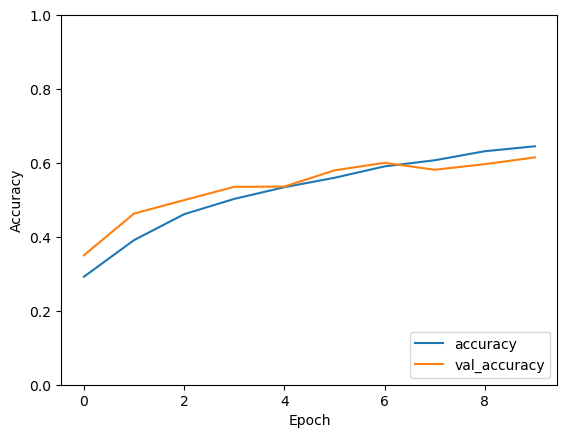

In [8]:
testmodel, historytest = compile(tester, 10)
evaluate(historytest)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 44, 44, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 21, 21, 128)      0         
 2D)                                                    

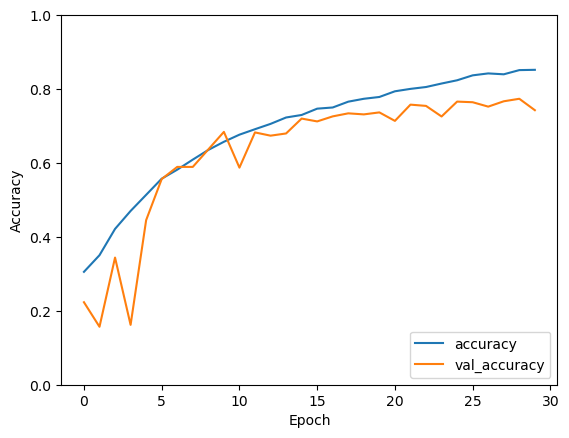

In [9]:
tf.keras.backend.clear_session()
tester = tf.keras.models.Sequential([
    layers.Conv2D(64, (3, 3), activation="relu", input_shape=(100, 100, 3)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    # BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.Conv2D(128, (3, 3), activation="relu"),
    # BatchNormalization(),
    # GlobalAveragePooling2D(),
    layers.MaxPooling2D((3, 3), strides=(2,2)),
    layers.Dropout(0.25),
    layers.Conv2D(256, (3, 3), activation="relu"),
    layers.Conv2D(256, (3, 3), activation="relu"),
    layers.GlobalAveragePooling2D(),
    # MaxPooling2D((3, 3)),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.25),
    layers.Dense(12, activation="softmax")
])
tester.summary()
testmodel, historytest = compile(tester, 30)
evaluate(historytest)

In [9]:
tf.keras.backend.clear_session()
tester = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.Conv2D(32, (5, 5), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.GlobalAveragePooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(12, activation='softmax')
])
tester.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 94, 94, 32)        25632     
                                                                 
 conv2d_2 (Conv2D)           (None, 92, 92, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 46, 46, 64)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 44, 44, 64)        36928     
                                                                 
 conv2d_4 (Conv2D)           (None, 42, 42, 128)       73856     
                                                        

Epoch 1/20
441/441 [==============================] - 31s 70ms/step - loss: 2.0747 - accuracy: 0.3292 - val_loss: 1.8965 - val_accuracy: 0.3573
Epoch 2/20
441/441 [==============================] - 26s 60ms/step - loss: 1.6360 - accuracy: 0.4505 - val_loss: 1.4355 - val_accuracy: 0.5099
Epoch 3/20
441/441 [==============================] - 26s 60ms/step - loss: 1.4083 - accuracy: 0.5330 - val_loss: 1.3902 - val_accuracy: 0.5363
Epoch 4/20
441/441 [==============================] - 26s 60ms/step - loss: 1.2705 - accuracy: 0.5741 - val_loss: 1.2050 - val_accuracy: 0.5865
Epoch 5/20
441/441 [==============================] - 26s 60ms/step - loss: 1.1649 - accuracy: 0.6140 - val_loss: 1.0718 - val_accuracy: 0.6390
Epoch 6/20
441/441 [==============================] - 26s 60ms/step - loss: 1.0555 - accuracy: 0.6545 - val_loss: 0.9800 - val_accuracy: 0.6687
Epoch 7/20
441/441 [==============================] - 26s 60ms/step - loss: 0.9740 - accuracy: 0.6769 - val_loss: 1.0045 - val_accuracy:

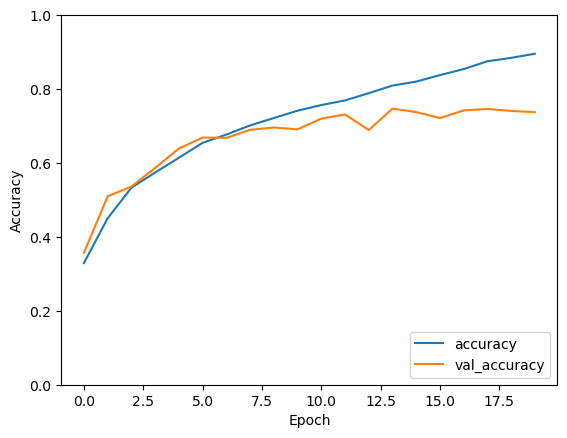

In [10]:
# 0.2 dropout
testmodel, historytest = compile(tester, 20)
evaluate(historytest)

Epoch 1/20
441/441 [==============================] - 36s 66ms/step - loss: 2.1803 - accuracy: 0.3044 - val_loss: 2.1688 - val_accuracy: 0.2995
Epoch 2/20
441/441 [==============================] - 27s 61ms/step - loss: 2.1088 - accuracy: 0.3159 - val_loss: 1.9801 - val_accuracy: 0.3571
Epoch 3/20
441/441 [==============================] - 27s 62ms/step - loss: 1.8014 - accuracy: 0.3908 - val_loss: 1.6005 - val_accuracy: 0.4475
Epoch 4/20
441/441 [==============================] - 27s 62ms/step - loss: 1.4538 - accuracy: 0.5116 - val_loss: 1.3260 - val_accuracy: 0.5528
Epoch 5/20
441/441 [==============================] - 27s 62ms/step - loss: 1.2788 - accuracy: 0.5681 - val_loss: 1.1689 - val_accuracy: 0.6168
Epoch 6/20
441/441 [==============================] - 27s 62ms/step - loss: 1.1316 - accuracy: 0.6172 - val_loss: 1.1231 - val_accuracy: 0.6254
Epoch 7/20
441/441 [==============================] - 27s 62ms/step - loss: 1.0369 - accuracy: 0.6536 - val_loss: 1.0752 - val_accuracy:

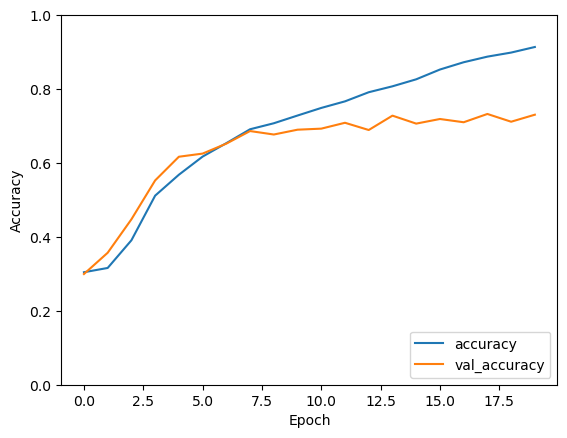

In [8]:
# without any dropout
testmodel, historytest = compile(tester, 20)
evaluate(historytest)

Epoch 1/20
441/441 [==============================] - 39s 65ms/step - loss: 2.1598 - accuracy: 0.3144 - val_loss: 1.9847 - val_accuracy: 0.3721
Epoch 2/20
441/441 [==============================] - 27s 62ms/step - loss: 1.8096 - accuracy: 0.3951 - val_loss: 1.5948 - val_accuracy: 0.4541
Epoch 3/20
441/441 [==============================] - 28s 64ms/step - loss: 1.5130 - accuracy: 0.4904 - val_loss: 1.3744 - val_accuracy: 0.5417
Epoch 4/20
441/441 [==============================] - 28s 63ms/step - loss: 1.3537 - accuracy: 0.5479 - val_loss: 1.2991 - val_accuracy: 0.5621
Epoch 5/20
441/441 [==============================] - 28s 63ms/step - loss: 1.2259 - accuracy: 0.5880 - val_loss: 1.1626 - val_accuracy: 0.6018
Epoch 6/20
441/441 [==============================] - 28s 63ms/step - loss: 1.1122 - accuracy: 0.6251 - val_loss: 1.0508 - val_accuracy: 0.6469
Epoch 7/20
441/441 [==============================] - 28s 63ms/step - loss: 1.0177 - accuracy: 0.6521 - val_loss: 0.9745 - val_accuracy:

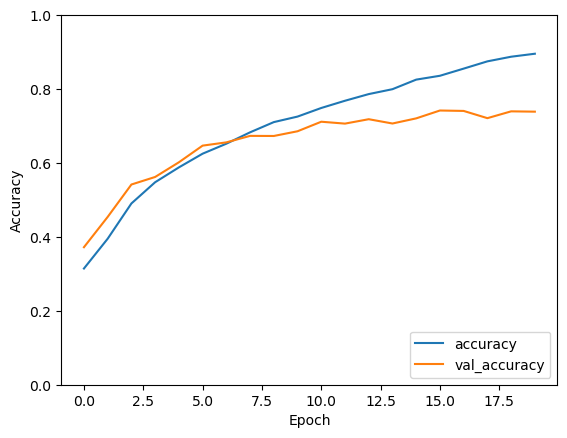

In [7]:
# With 0.1 dropout
testmodel, historytest = compile(tester, 20)
evaluate(historytest)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 94, 94, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 64)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 45, 45, 64)        36928     
                                                                 
 conv2d_4 (Conv2D)           (None, 43, 43, 128)       73856     
                                                        

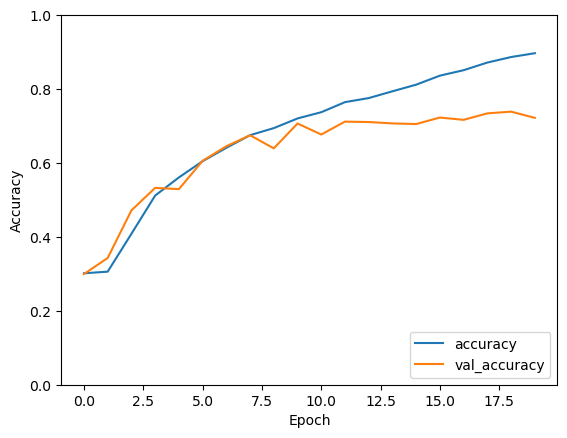

In [20]:
# smaller dense
tf.keras.backend.clear_session()
tester = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.GlobalAveragePooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    # tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(12, activation='softmax')
])
tester.summary()
testmodel, historytest = compile(tester, 20)
evaluate(historytest)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 94, 94, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 64)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 45, 45, 64)        36928     
                                                                 
 conv2d_4 (Conv2D)           (None, 43, 43, 64)        36928     
                                                        

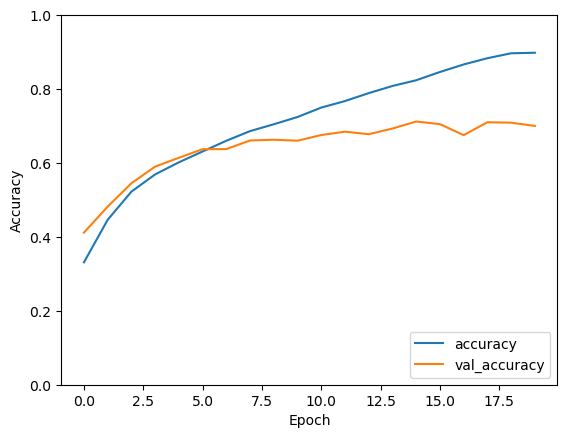

In [19]:
# smaller dense + more dense layer
tf.keras.backend.clear_session()
tester = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.GlobalAveragePooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(12, activation='softmax')
])
tester.summary()
testmodel, historytest = compile(tester, 20)
evaluate(historytest)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 94, 94, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 conv2d_4 (Conv2D)           (None, 27, 27, 64)        36928     
                                                        

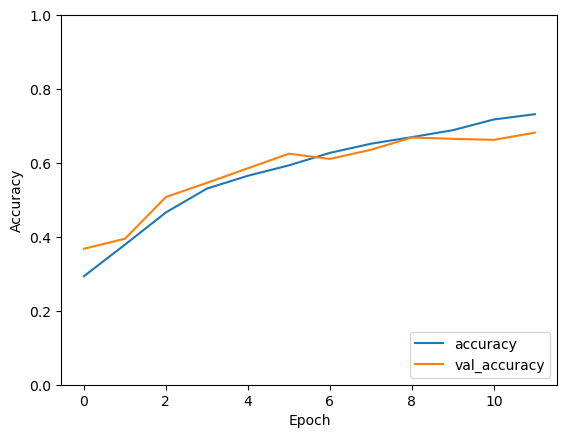

In [18]:

tf.keras.backend.clear_session()
tester = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.GlobalAveragePooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(12, activation='softmax')
])
tester.summary()
testmodel, historytest = compile(tester, 12)
evaluate(historytest)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 94, 94, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 64)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 45, 45, 64)        36928     
                                                                 
 conv2d_4 (Conv2D)           (None, 43, 43, 128)       73856     
                                                        

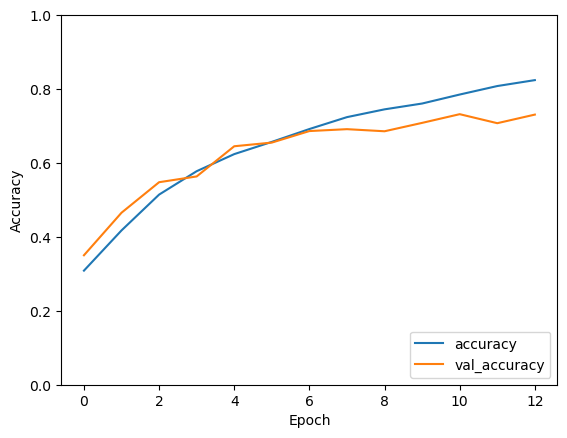

In [21]:
# smaller dense
tf.keras.backend.clear_session()
tester = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.GlobalAveragePooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    # tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(12, activation='softmax')
])
tester.summary()
testmodel, historytest = compile(tester, 13)
evaluate(historytest)

In [ ]:
tester.save("model_test.h5")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 94, 94, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 64)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 45, 45, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 128)      0         
 2D)                                                    

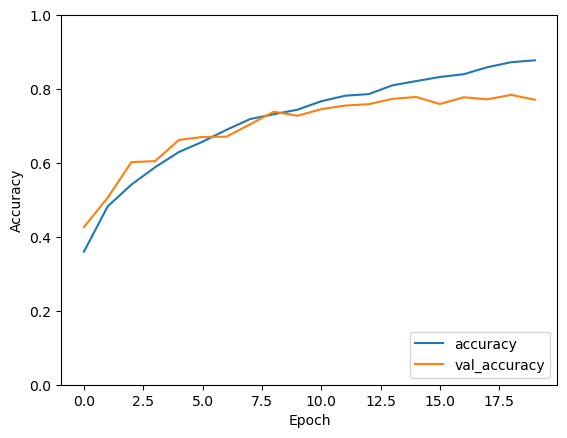

In [8]:
tf.keras.backend.clear_session()
tester = tf.keras.models.Sequential([
    # Block 1
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # Block 2
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # Block 3
    layers.Conv2D(256, (3, 3), activation='relu'),
    # Convert to 1 dimensional array
    layers.GlobalAveragePooling2D(),
    # Use dense to capture the patterns and produce output
    layers.Dense(128, activation='relu'),
    layers.Dropout(rate=0.35),
    layers.Dense(12, activation='softmax')
])
tester.summary()
testmodel, historytest = compile(tester, 20)
evaluate(historytest)